# CLUSTERING: DBSCAN


In [73]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [74]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/University/Data Mining - 1/DATAMINING_PROJECT/class_df.csv')

In [75]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,0,...,12,3,0,2,3,3,2,2,2,1
1,20,0,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,0,...,13,4,1,1,3,3,1,0,0,0
2,37,0,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,1,...,13,3,0,10,2,3,3,2,0,2
3,39,0,Travel_Rarely,1354,Research & Development,5,3,Medical,3,1,...,12,4,0,14,3,3,10,10,5,8
4,35,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,1,...,13,2,1,15,3,3,13,12,5,11


In [76]:
df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

In [77]:
features_selected = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [78]:
X = df[features_selected]
X.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,TotalSatisfaction
0,31,9,7978.000000,2,2,10
1,20,2,2323.000000,1,1,9
2,37,17,3375.000000,10,3,8
3,39,5,3069.000000,14,10,8
4,35,1,8264.307692,15,13,7


In [79]:
# normalize
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [80]:
neigh = NearestNeighbors(n_neighbors=5)

nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

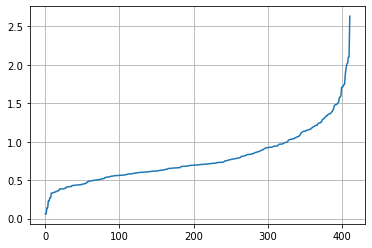

In [81]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.grid()
plt.plot(distances)

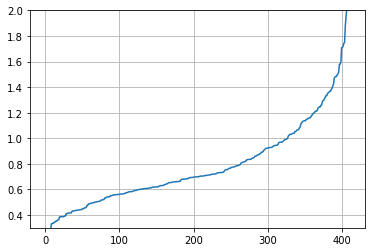

In [82]:
# ZOOM 
plt.grid()
plt.ylim([0.3,2])
plt.plot(distances)

In [105]:
clf = DBSCAN(eps=1.2, min_samples=5)
clf.fit(X)

DBSCAN(eps=1.2)

In [106]:
clusters = clf.labels_

In [107]:
from sklearn.decomposition import PCA
pca = PCA(3,random_state=42)

pca.fit(X)
pca_proj = pca.transform(X)

In [108]:
pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2','pca3'])
pca_proj['cluster'] = clusters
pca_proj.head()

,pca1,pca2,pca3,cluster
0,-0.586098,1.359286,-0.432514,0
1,-2.650133,0.431248,-0.605335,0
2,-0.389515,-1.063731,0.091984,0
3,0.221787,-0.933285,-0.423159,0
4,1.460075,0.479079,0.395113,-1


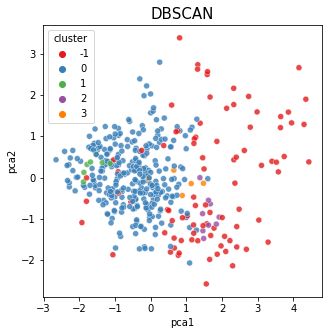

In [109]:
# plot scatter of PCA
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='cluster',
    data=pca_proj,
    legend="full",
    alpha=0.8,
    palette="Set1"
)
plt.title("DBSCAN", fontsize= 15)
plt.show()

In [110]:
X = pd.DataFrame(X, columns=features_selected)
X['cluster'] = clusters

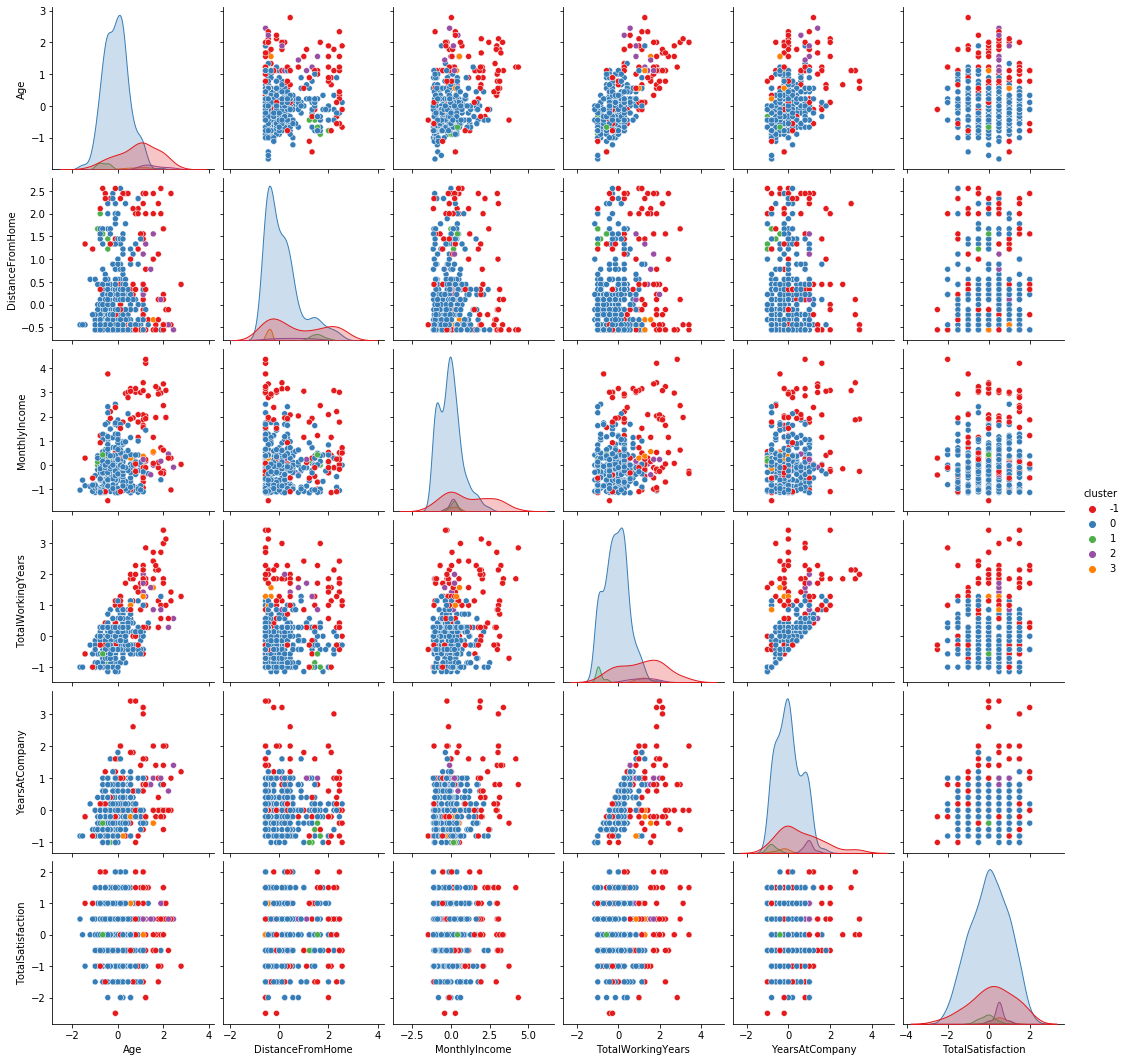

In [111]:
sns.pairplot(X, hue = "cluster" , palette='Set1')
plt.show()